In [3]:
target_rd=3000

import pandas as pd 
df= pd.read_csv('output_CD8.csv', index_col=0)
df

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g
AAACCTGAGAAACGAG-1_13_1,-0.098436,-0.351365,-0.566494,-0.061993,0.153536,2.021764,0.182973
AAACCTGAGAAACGCC-1_16_1,-0.017802,-0.343835,-0.501123,-0.241483,0.071860,2.549293,0.323893
AAACCTGAGAAGATTC-1_13_1,-0.238312,-0.299291,-0.530044,-0.238629,0.218767,2.490457,0.227181
AAACCTGAGAAGGGTA-1_8_2,0.223560,-0.099895,-0.223325,-0.083291,0.323954,1.710888,0.222520
AAACCTGAGAATTGTG-1_7_2,0.165879,-0.197214,-0.246176,0.007111,0.316033,2.073315,0.181891
...,...,...,...,...,...,...,...
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGAACTCAATAAGG-1,0.160951,-0.164971,-0.292480,-0.055379,0.604717,2.038781,0.166079
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGCAAGTCTTCAAG-1,-0.106136,-0.313582,-0.463990,-0.219629,0.131538,1.961870,0.070212
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTATGCAGCGTTGCC-1,-0.070015,-0.248626,-0.324710,-0.285509,0.345954,2.364253,0.130767
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTCCTCTCTGCTGCT-1,0.065543,-0.162404,-0.286431,-0.050731,0.368565,2.176138,0.202307


In [4]:
scale_CD8 = pd.read_csv('../data/scale_CD8.tsv', sep = "\t", index_col=0)
scale_CD8

,mean,sd
signature,,
CD8_Lowery_pos_243g,0.362506,0.095228
CD8_Oliveira_TTE_100g,0.161207,0.105119
CD8_Oliveira_pos_74g,0.006769,0.143675
CD8_Yost_CD8_Exh_100g,0.250270,0.134015
CD8_ave_Hanada_pos_27g,0.500332,0.206234
CD8_ave_Hanada_neg_5g,1.820868,0.400367
CD8_ave_Oliveira_virus_26g,0.203399,0.103565


In [5]:
df

,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g
AAACCTGAGAAACGAG-1_13_1,-0.098436,-0.351365,-0.566494,-0.061993,0.153536,2.021764,0.182973
AAACCTGAGAAACGCC-1_16_1,-0.017802,-0.343835,-0.501123,-0.241483,0.071860,2.549293,0.323893
AAACCTGAGAAGATTC-1_13_1,-0.238312,-0.299291,-0.530044,-0.238629,0.218767,2.490457,0.227181
AAACCTGAGAAGGGTA-1_8_2,0.223560,-0.099895,-0.223325,-0.083291,0.323954,1.710888,0.222520
AAACCTGAGAATTGTG-1_7_2,0.165879,-0.197214,-0.246176,0.007111,0.316033,2.073315,0.181891
...,...,...,...,...,...,...,...
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGAACTCAATAAGG-1,0.160951,-0.164971,-0.292480,-0.055379,0.604717,2.038781,0.166079
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGCAAGTCTTCAAG-1,-0.106136,-0.313582,-0.463990,-0.219629,0.131538,1.961870,0.070212
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTATGCAGCGTTGCC-1,-0.070015,-0.248626,-0.324710,-0.285509,0.345954,2.364253,0.130767
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTCCTCTCTGCTGCT-1,0.065543,-0.162404,-0.286431,-0.050731,0.368565,2.176138,0.202307


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

pos_sigs_CD8 = [
    "CD8_Lowery_pos_243g", 
    "CD8_Oliveira_TTE_100g", 
    "CD8_Oliveira_pos_74g", 
    "CD8_Yost_CD8_Exh_100g", 
    "CD8_ave_Hanada_pos_27g"
]
neg_sigs_CD8 = [
    "CD8_ave_Hanada_neg_5g", 
    "CD8_ave_Oliveira_virus_26g"
]

# Standardize the specified columns
df_std = df.copy()
# Ensure all columns of df_std are in scale_CD8.index
missing_cols = [col for col in df_std.columns if col not in scale_CD8.index]
if missing_cols:
    raise ValueError(f"The following columns are missing in scale_CD8.index: {missing_cols}")

for col in df_std.columns:
    df_std[col] = (df_std[col] - scale_CD8.loc[col, "mean"]) / scale_CD8.loc[col, "sd"]
df_std



,CD8_Lowery_pos_243g,CD8_Oliveira_TTE_100g,CD8_Oliveira_pos_74g,CD8_Yost_CD8_Exh_100g,CD8_ave_Hanada_pos_27g,CD8_ave_Hanada_neg_5g,CD8_ave_Oliveira_virus_26g
AAACCTGAGAAACGAG-1_13_1,-4.840385,-4.876105,-3.989998,-2.330065,-1.681566,0.501779,-0.197232
AAACCTGAGAAACGCC-1_16_1,-3.993636,-4.804470,-3.535010,-3.669402,-2.077600,1.819393,1.163459
AAACCTGAGAAGATTC-1_13_1,-6.309229,-4.380726,-3.736304,-3.648106,-1.365268,1.672439,0.229634
AAACCTGAGAAGGGTA-1_8_2,-1.459084,-2.483870,-1.601490,-2.488995,-0.855230,-0.274699,0.184627
AAACCTGAGAATTGTG-1_7_2,-2.064791,-3.409661,-1.760535,-1.814427,-0.893638,0.630540,-0.207680
...,...,...,...,...,...,...,...
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGAACTCAATAAGG-1,-2.116547,-3.102933,-2.082820,-2.280713,0.506149,0.544282,-0.360351
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTGGCAAGTCTTCAAG-1,-4.921246,-4.516675,-3.276556,-3.506326,-1.788230,0.352182,-1.286022
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTATGCAGCGTTGCC-1,-4.541929,-3.898752,-2.307147,-3.997914,-0.748555,1.357216,-0.701314
restaging-30-518937639_fastq_v1_2021-04-27-1-8_hash9_TTTCCTCTCTGCTGCT-1,-3.118431,-3.078517,-2.040716,-2.246035,-0.638917,0.887361,-0.010548


In [7]:
pos_cut = -0.1454463
neg_cut = -0.06552305

df["pos_score_CD8"] = df_std[pos_sigs_CD8].mean(axis=1)
df["neg_score_CD8"] = df_std[neg_sigs_CD8].mean(axis=1)
df["cancer_reactive_per_cell_CD8"] = (
        (df["pos_score_CD8"] >  pos_cut) &
        (df["neg_score_CD8"] <  neg_cut)
    )
df["cancer_reactive_per_cell_CD8"] = df["cancer_reactive_per_cell_CD8"].astype(int)
df["cancer_reactive_per_cell_CD8"].value_counts().sort_index()

cancer_reactive_per_cell_CD8
0    273362
1       145
Name: count, dtype: int64

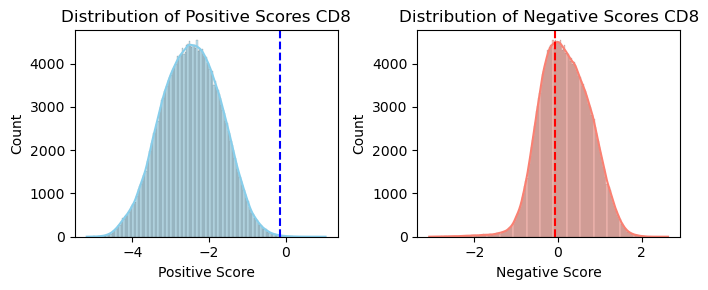

In [8]:
plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
sns.histplot(df['pos_score_CD8'], kde=True, color='skyblue')
plt.axvline(pos_cut, color='blue', linestyle='--', linewidth=1.5, label=f'cut={pos_cut:.2f}')
plt.title('Distribution of Positive Scores CD8')
plt.xlabel('Positive Score')

plt.subplot(1, 2, 2)
sns.histplot(df['neg_score_CD8'], kde=True, color='salmon')
plt.axvline(neg_cut, color='red', linestyle='--', linewidth=1.5, label=f'cut={neg_cut:.2f}')
plt.title('Distribution of Negative Scores CD8')
plt.xlabel('Negative Score')

plt.tight_layout()
plt.show()

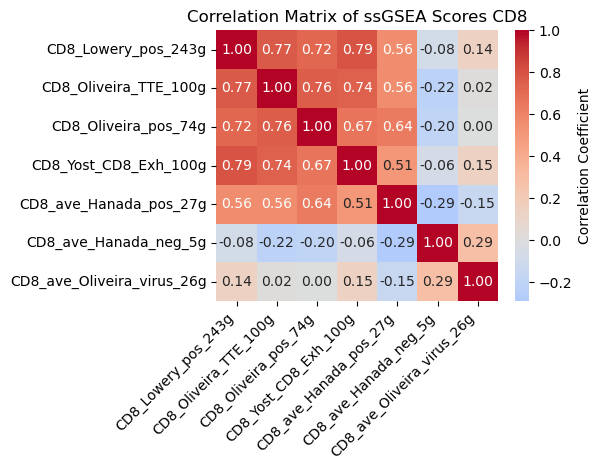

In [9]:
all_sigs_CD8 = pos_sigs_CD8+neg_sigs_CD8

corr_matrix = df[all_sigs_CD8].corr()

plt.figure(figsize=(6,4.8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", 
                      cbar_kws={"label": "Correlation Coefficient"})


plt.title("Correlation Matrix of ssGSEA Scores CD8")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
df.to_csv("../wang_2024/cell_meta_data_CD8.csv", index=True)